In [ ]:
#PCA tiene el problema que sólo reconoce comportamientos lineales
#T-SNE sirve para proyectar múltiples dimensiones a menos dimensiones (2D)
#y tiende a respetar más la posible no-linealidad entre las dimensiones
#Tiene el problema que hay que añadir un parámetro de ajust que se llama "perplejidad"
# TensorFlow

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('df_credit (2021_08_13 15_24_06 UTC).csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,housing_encoded,sex_encoded
0,0,67,male,2,own,little,little,1169,6,radio/TV,1,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0
2,2,49,male,1,own,little,little,2096,12,education,1,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,1
4,4,53,male,2,free,little,little,4870,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment,1,0
996,996,40,male,3,own,little,little,3857,30,car,1,1
997,997,38,male,2,own,little,little,804,12,radio/TV,1,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,0,1


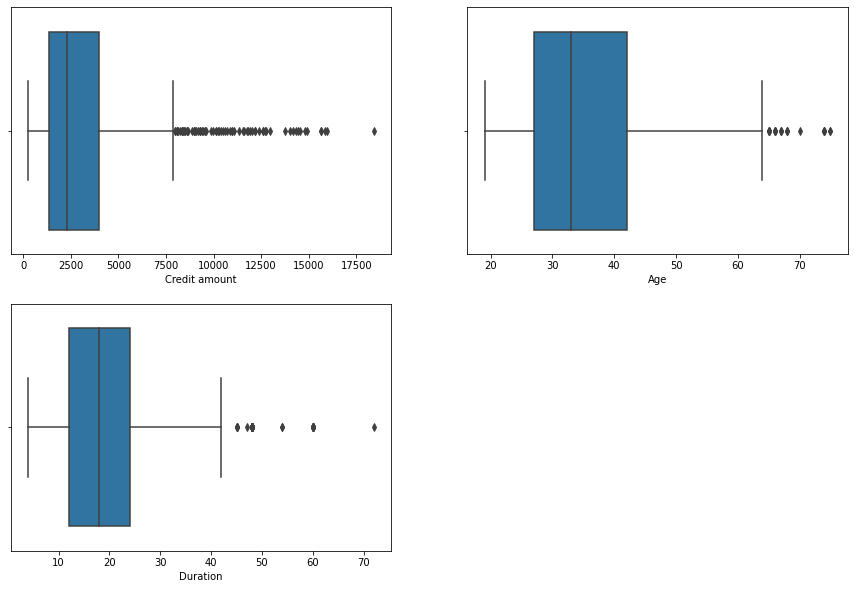

In [16]:
data=['Credit amount','Age','Duration']

#quiero ver su distribución con un poderosísimo boxplot

fig=plt.figure(figsize=(15,10))

axes=220

for data in data:
  axes+=1
  fig.add_subplot(axes)
  sns.boxplot(data=df,x=data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

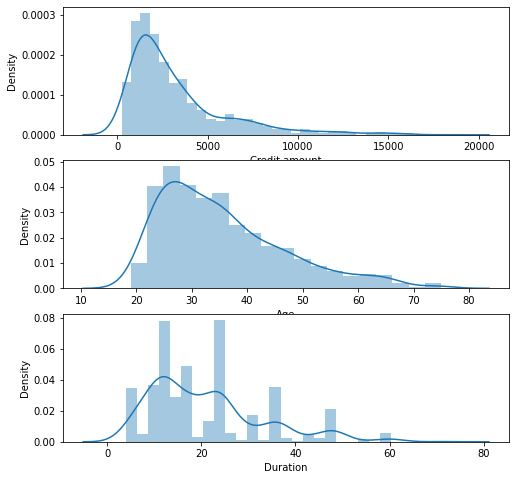

In [6]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,8))
sns.distplot(df['Credit amount'],ax=ax1)
sns.distplot(df['Age'],ax=ax2)
sns.distplot(df['Duration'],ax=ax3)

In [7]:
df_cluster=pd.DataFrame()
df_cluster['Credit amount']=df['Credit amount']
df_cluster['Age']=df['Age']
df_cluster['Duration']=df['Duration']

df_cluster

,Credit amount,Age,Duration
0,1169,67,6
1,5951,22,48
2,2096,49,12
3,7882,45,42
4,4870,53,24
...,...,...,...
995,1736,31,12
996,3857,40,30
997,804,38,12
998,1845,23,45


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

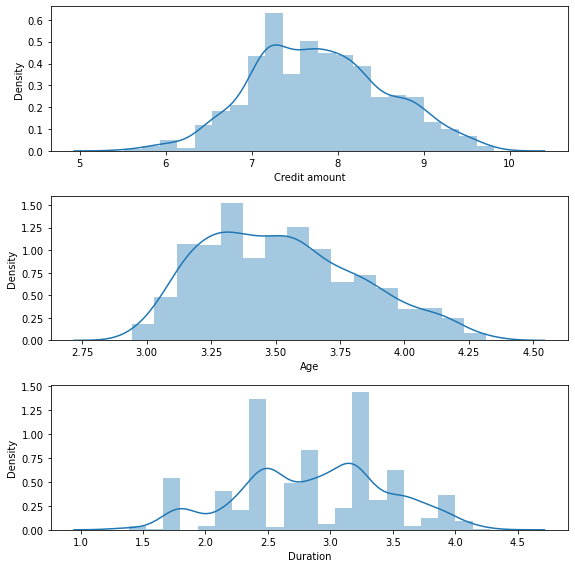

In [9]:
df_cluster_log=np.log(df_cluster[['Age','Credit amount','Duration']])

fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,8))
sns.distplot(df_cluster_log['Credit amount'],ax=ax1)
sns.distplot(df_cluster_log['Age'],ax=ax2)
sns.distplot(df_cluster_log['Duration'],ax=ax3)

plt.tight_layout()


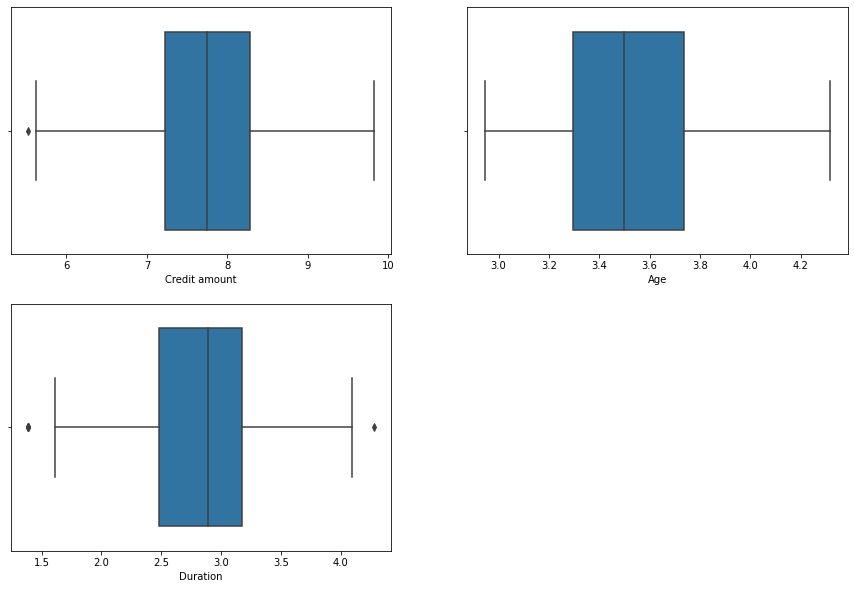

In [18]:
data=['Credit amount','Age','Duration']

#quiero ver su distribución con un poderosísimo boxplot

fig=plt.figure(figsize=(15,10))

axes=220

for data in data:
  axes+=1
  fig.add_subplot(axes)
  sns.boxplot(data=df_cluster_log,x=data)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cluster_scaled=scaler.fit_transform(df_cluster_log)

In [21]:
num_clust=np.arange(2,10)
scores=[]

In [23]:
for i in num_clust:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(cluster_scaled)

  score=metrics.silhouette_score(cluster_scaled,kmeans.labels_)

  scores.append(score)
  print(i,score)

2 0.3153441336069185
3 0.30318933408774545
4 0.2679127254059482
5 0.26745665373123895
6 0.2531585073574426
7 0.2596022916073647
8 0.25860792464881355
9 0.2560065738534127


In [24]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
model=KMeans(n_clusters=3,random_state=123)
model.fit(cluster_scaled)
kmeans_labels=model.labels_

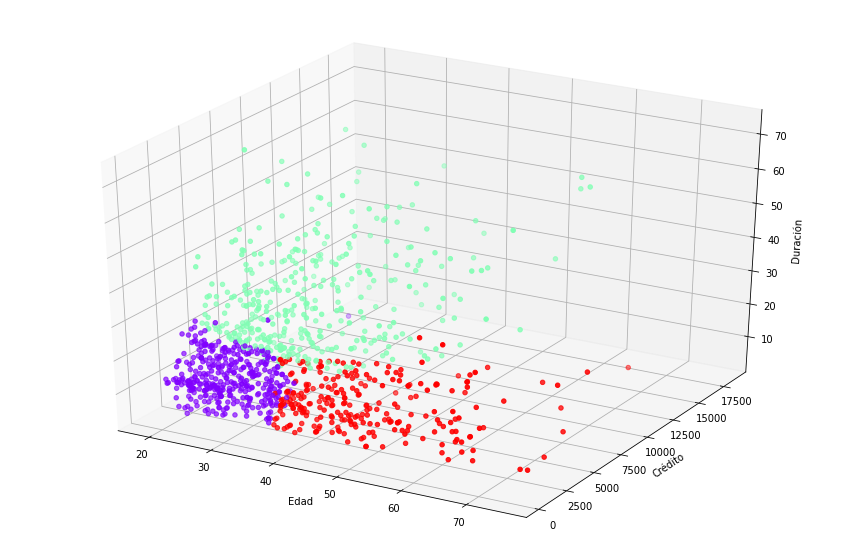

In [28]:
fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],
             c=kmeans_labels,cmap='rainbow')
xLabel=ax.set_xlabel('Edad')
yLabel=ax.set_ylabel('Crédito')
zLabel=ax.set_zlabel('Duración')

In [ ]:
import plotly.graph_objs as go

#1.- hay que hacer un diccionario de los ejes

dicc=dict(xaxis=dict(title='Age'),
          yaxis=dict(title='Credit amount'),zaxis=dict(title='Duration'))

puntitos=[go.Scatter3d(x=df_cluster['Age'],y=df_cluster['Credit amount'],
     z=df_cluster['Duration'],mode='markers',marker=dict(color=kmeans_labels))]

#escena

escena=go.Layout(scene=dicc,height=1000,width=1000)

fig=go.Figure(data=puntitos,layout=escena)
fig.show()

In [36]:
df_clusters=df_cluster.assign(Cluster=kmeans_labels)
grupo=df_clusters.groupby('Cluster').mean().round(1)
grupo

,Credit amount,Age,Duration
Cluster,,,
0,1732.2,27.8,14.2
1,5665.4,34.0,32.2
2,1979.7,48.7,13.9


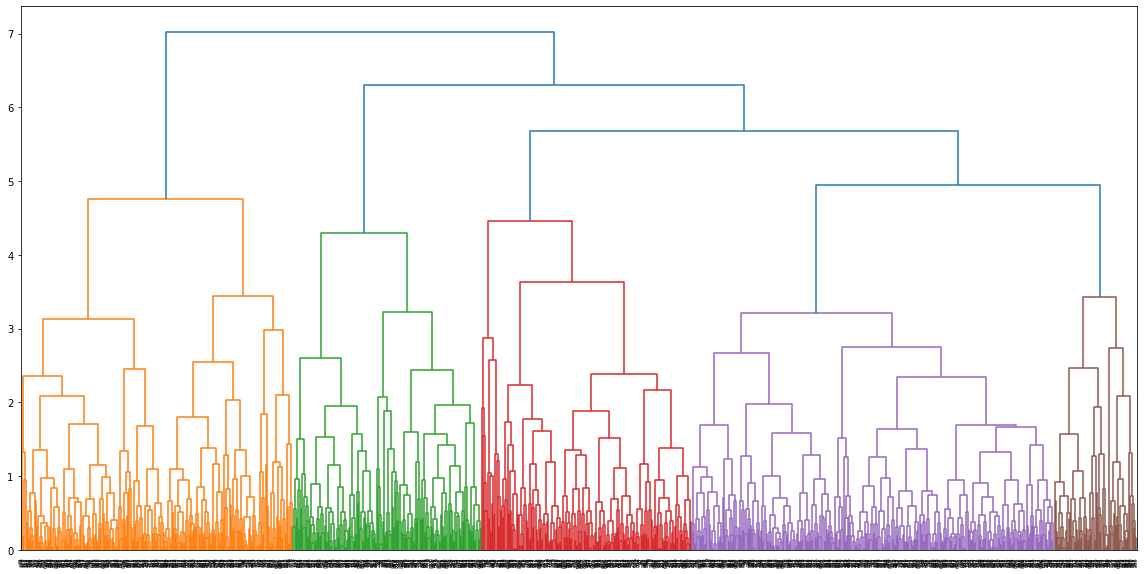

In [37]:



from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendro=sch.dendrogram(sch.linkage(cluster_scaled,method='complete'))

In [39]:
for i in num_clust:
  ac=AgglomerativeClustering(n_clusters=i)
  ac.fit(cluster_scaled)

  score=metrics.silhouette_score(cluster_scaled,ac.labels_)
  print('El número de clústers=',i,' como resultado un score de silueta de: ',score)

El número de clústers= 2  como resultado un score de silueta de:  0.2715239252669289
El número de clústers= 3  como resultado un score de silueta de:  0.24114611066359173
El número de clústers= 4  como resultado un score de silueta de:  0.23516132192529005
El número de clústers= 5  como resultado un score de silueta de:  0.22637878611347736
El número de clústers= 6  como resultado un score de silueta de:  0.20657375240773734
El número de clústers= 7  como resultado un score de silueta de:  0.2007796519469468
El número de clústers= 8  como resultado un score de silueta de:  0.20797768642134373
El número de clústers= 9  como resultado un score de silueta de:  0.2053220139842984


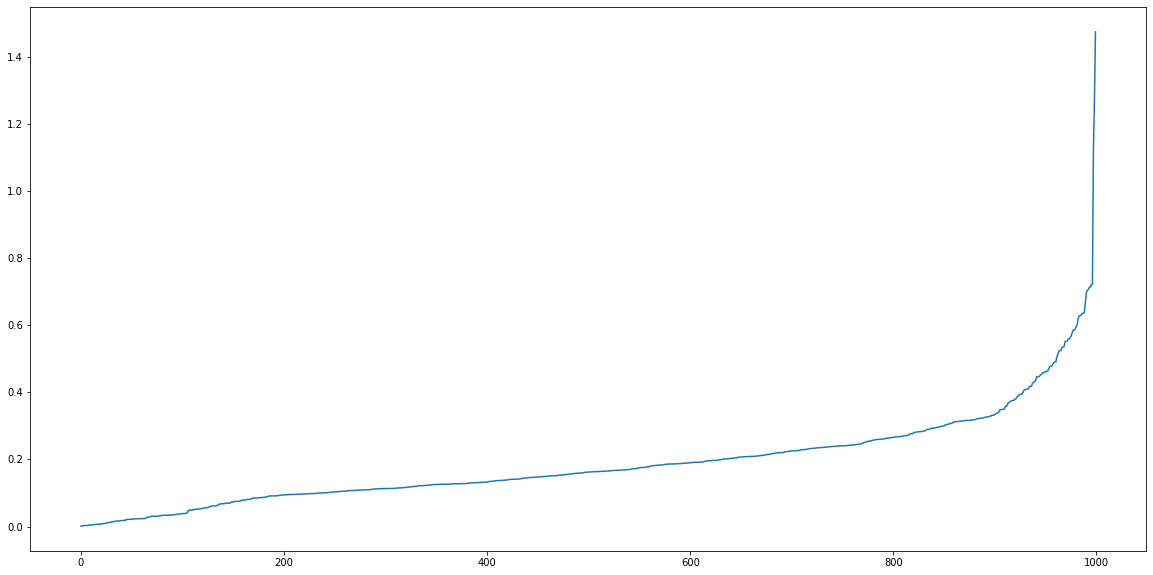

In [49]:
from sklearn.neighbors import NearestNeighbors

n_n=NearestNeighbors(n_neighbors=5)
n_n.fit(cluster_scaled)

distancias,indice=n_n.kneighbors(cluster_scaled)

distancias=np.sort(distancias,axis=0)[:,1]

plt.figure(figsize=(20,10))
plt.plot(distancias)
plt.show()


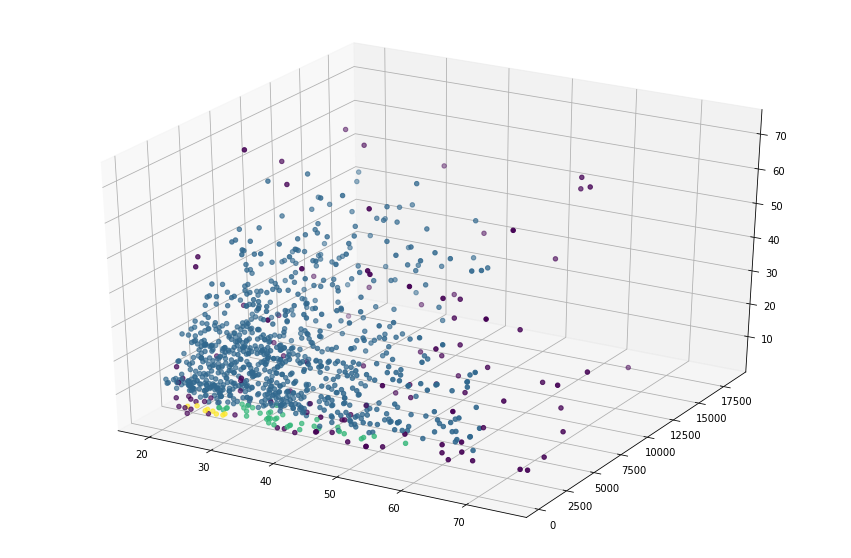

In [48]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.45)
model.fit(cluster_scaled)

fig=plt.figure(figsize=(15,10))
ax=plt.axes(projection='3d')

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],
             c=model.labels_)
